In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D

Using TensorFlow backend.


In [2]:
TRAINING_DATA_PATH = "data/train_happy.h5"
TEST_DATA_PATH = "data/test_happy.h5"

In [3]:
def load_dataset():
    train_data = h5py.File(TRAINING_DATA_PATH, "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File(TEST_DATA_PATH, "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [4]:
X_train, y_train, X_test, y_test = load_dataset()

[1]


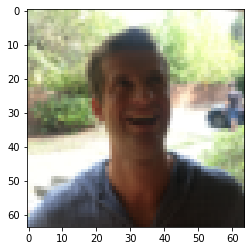

In [9]:
plt.imshow(X_train[3])
print(y_train.T[3])

In [10]:
# processing image
# Chia 255 de giam phep tinh cua X
train_X = X_train/255
test_X = X_test/255
train_Y = y_train.T
test_Y = y_test.T

In [14]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
EPOCHS = 32
batch_size = 32

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [17]:
# Train model
# his = model.fit(train_X, train_Y, batch_size=batch_size,epochs=EPOCHS,verbose = 1)

Epoch 1/32
600/600 [==============================] - 9s 15ms/step - loss: 0.6995 - accuracy: 0.5317
Epoch 2/32
600/600 [==============================] - 10s 17ms/step - loss: 0.6743 - accuracy: 0.6183
Epoch 3/32
600/600 [==============================] - 9s 15ms/step - loss: 0.6675 - accuracy: 0.7167
Epoch 4/32
600/600 [==============================] - 9s 15ms/step - loss: 0.4485 - accuracy: 0.7950
Epoch 5/32
600/600 [==============================] - 12s 19ms/step - loss: 0.3561 - accuracy: 0.8650
Epoch 6/32
600/600 [==============================] - 12s 20ms/step - loss: 0.2364 - accuracy: 0.9050
Epoch 7/32
600/600 [==============================] - 11s 18ms/step - loss: 0.2494 - accuracy: 0.9017
Epoch 8/32
600/600 [==============================] - 11s 19ms/step - loss: 0.1408 - accuracy: 0.9467
Epoch 9/32
600/600 [==============================] - 11s 18ms/step - loss: 0.1380 - accuracy: 0.9517
Epoch 10/32
600/600 [==============================] - 9s 16ms/step - loss: 0.1032 - 

In [18]:
test_score = model.evaluate(test_X,test_Y,verbose = 1)

150/150 [==============================] - 1s 4ms/step


In [19]:
print('test loss:', test_score[0])
print('test accuracy:', test_score[1])

test loss: 0.39851918230454125
test accuracy: 0.9599999785423279


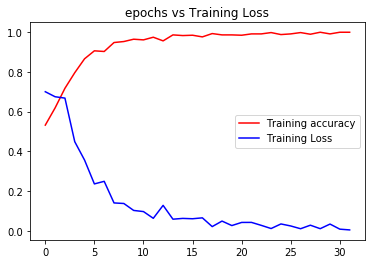

In [22]:
training_accuracy = his.history['accuracy']
training_loss = his.history['loss']

E = range(len(training_accuracy))
plt.plot(E, training_accuracy, color='red', label='Training accuracy')
plt.title('epochs vs Training accuracy')
# plt.legend()

# plt.figure()
plt.plot(E, training_loss, color='blue', label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [52]:
#save model to h5 file
model.save_weights('happy_house.h5')

In [53]:
model.save('happy_model.h5')

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

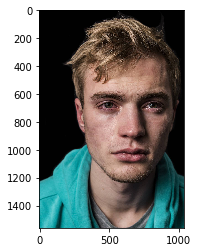

In [48]:
from PIL import Image
img = Image.open('cry1.jpg')
plt.imshow(img)

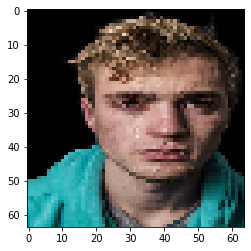

In [49]:
# test = np.asarray(img.resize(64,64))
# test = test.reshape((1,) + test.shape)
# test.shape
newsize = (64,64)
im1 = img.resize(newsize)
test = np.asarray(im1)
test = test.reshape((1,) + test.shape)
plt.imshow(test[0])

In [50]:
print(model.predict(test,verbose=1))

1/1 [==============================] - 0s 15ms/step
[[0.]]
